### Install NLTK and Import Libraries

NLTK: https://www.nltk.org/install.html
<br>NLTK data: https://www.nltk.org/data.html
<br>Anaconda: https://anaconda.org/anaconda/nltk

NLTK Interface: http://www.nltk.org/howto/wordnet.html 
<br>Documentation: https://www.nltk.org/api/nltk.corpus.reader.html#module-nltk.corpus.reader.wordnet

In [1]:
#!conda install nltk
#!conda install -c anaconda nltk 

In [2]:
import nltk
#nltk.download()
#nltk.download('wordnet')
nltk.__version__

'3.3'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

pd.set_option('display.max_colwidth', -1)
sns.set(style='whitegrid', color_codes=True)

### Setup of Dataframe

In [4]:
words = list(wn.words())
lemmas = list(wn.all_lemma_names())
synsets = list(wn.all_synsets())
print('Number of words:', len(words))
print('Number of lemmas:', len(lemmas))
print('Number of synsets:', len(synsets))

Number of words: 147306
Number of lemmas: 147306
Number of synsets: 117659


Confirm that words and lemmas are the same.

In [5]:
print(sorted(lemmas)[:100])

["'hood", "'s_gravenhage", "'tween", "'tween_decks", '.22', '.22-caliber', '.22-calibre', '.22_caliber', '.22_calibre', '.38-caliber', '.38-calibre', '.38_caliber', '.38_calibre', '.45-caliber', '.45-calibre', '.45_caliber', '.45_calibre', '0', '1', '1-dodecanol', '1-hitter', '10', '10-membered', '100', '1000', '10000', '100000', '1000000', '1000000000', '1000000000000', '1000th', '100th', '101', '101st', '105', '105th', '10th', '11', '11-plus', '110', '110th', '115', '115th', '11_november', '11th', '12', '12-tone_music', '12-tone_system', '120', '120th', '125', '125th', '12th', '13', '130', '130th', '135', '135th', '13th', '14', '140', '140th', '144', '145', '145th', '14_july', '14th', '15', '150', '150th', '1530s', '155', '155th', '15_august_1945', '15_may_organization', '15_minutes', '15th', '16', '160', '160th', '165', '165th', '16_pf', '16th', '17', '170', '170th', '1728', '175', '1750s', '175th', '1760s', '1770s', '1780s', '1790s', '17_november', '17th', '18', '18-karat_gold', '1

In [6]:
print(sorted(words)[:100])

["'hood", "'s_gravenhage", "'tween", "'tween_decks", '.22', '.22-caliber', '.22-calibre', '.22_caliber', '.22_calibre', '.38-caliber', '.38-calibre', '.38_caliber', '.38_calibre', '.45-caliber', '.45-calibre', '.45_caliber', '.45_calibre', '0', '1', '1-dodecanol', '1-hitter', '10', '10-membered', '100', '1000', '10000', '100000', '1000000', '1000000000', '1000000000000', '1000th', '100th', '101', '101st', '105', '105th', '10th', '11', '11-plus', '110', '110th', '115', '115th', '11_november', '11th', '12', '12-tone_music', '12-tone_system', '120', '120th', '125', '125th', '12th', '13', '130', '130th', '135', '135th', '13th', '14', '140', '140th', '144', '145', '145th', '14_july', '14th', '15', '150', '150th', '1530s', '155', '155th', '15_august_1945', '15_may_organization', '15_minutes', '15th', '16', '160', '160th', '165', '165th', '16_pf', '16th', '17', '170', '170th', '1728', '175', '1750s', '175th', '1760s', '1770s', '1780s', '1790s', '17_november', '17th', '18', '18-karat_gold', '1

Verify how to translate a word-synset pair into a lemma, which allows for its antonym to be obtained. Note that the first lemma in the lemma list corresponds to the word-synset pair.

In [7]:
take_n_synsets = wn.synsets('take', pos='n')
print(take_n_synsets)
print()
print(take_n_synsets[0])
print(take_n_synsets[0].lemmas())
print(take_n_synsets[0].lemmas()[0])
print(take_n_synsets[0].lemmas()[0].antonyms())
print()
print(take_n_synsets[1])
print(take_n_synsets[1].lemmas())
print(take_n_synsets[1].lemmas()[0])
print(take_n_synsets[1].lemmas()[0].antonyms())

[Synset('return.n.06'), Synset('take.n.02')]

Synset('return.n.06')
[Lemma('return.n.06.return'), Lemma('return.n.06.issue'), Lemma('return.n.06.take'), Lemma('return.n.06.takings'), Lemma('return.n.06.proceeds'), Lemma('return.n.06.yield'), Lemma('return.n.06.payoff')]
Lemma('return.n.06.return')
[]

Synset('take.n.02')
[Lemma('take.n.02.take')]
Lemma('take.n.02.take')
[]


Focussing only on nouns, verbs, and adjectives, loop through each sense of each word in WordNet. Append each sense (synset), word, POS tag, and antonym to a list. 

*Note*: using a list structure as opposed to a dictionary structure is important because senses (synsets) can belong to more than one word (lemma). We want to keep these senses separate from each other.

In [8]:
senses = []

for word in words:
    for sense in wn.synsets(word, pos='n'):
        senses.append({'synset': sense, 'word': word, 'pos': 'noun', 'antonym': sense.lemmas()[0].antonyms()})
    for sense in wn.synsets(word, pos='v'):
        senses.append({'synset': sense, 'word': word, 'pos': 'verb', 'antonym': sense.lemmas()[0].antonyms()})
    for sense in wn.synsets(word, pos='a'):
        senses.append({'synset': sense, 'word': word, 'pos': 'adjective', 'antonym': sense.lemmas()[0].antonyms()})

In [9]:
wordnet_df = pd.DataFrame(senses)
wordnet_df.set_index('synset', inplace=True)
wordnet_df.antonym = wordnet_df.antonym.apply(lambda y: np.nan if len(y)==0 else y)
wordnet_df = wordnet_df[['word', 'pos', 'antonym']]
print(wordnet_df.shape)
wordnet_df.sample(10)

(222117, 3)


,word,pos,antonym
synset,,,
Synset('independent_variable.n.01'),independent_variable,noun,NaN
Synset('watercourse.n.03'),waterway,noun,NaN
Synset('strain.n.10'),strain,noun,NaN
Synset('brandenburg.n.01'),brandenburg,noun,NaN
Synset('reject.v.06'),refuse,verb,[Lemma('admit.v.02.admit')]
Synset('deal.v.09'),dealings,verb,NaN
Synset('component.n.01'),ingredient,noun,NaN
Synset('guilty.s.02'),shamed,adjective,NaN
Synset('ladyfinger.n.01'),ladyfinger,noun,NaN


**Sanity Checks**

As the structure of WordNet is rather complicated, we should perform several sanity checks based upon what we know about the lexical database before proceeding. We know that one word can have multiple senses (or synsets). We want to keep these senses distinct from each other. Thus, our first check is to make sure that a highly polysemous word is fully represented in the dataframe.

In [10]:
print(len(wn.synsets('take')))
print(len(wordnet_df.loc[wordnet_df.word=='take']))
print(wn.synsets('take'))
wordnet_df.loc[wordnet_df.word=='take']

44
44
[Synset('return.n.06'), Synset('take.n.02'), Synset('take.v.01'), Synset('take.v.02'), Synset('lead.v.01'), Synset('take.v.04'), Synset('assume.v.03'), Synset('take.v.06'), Synset('bring.v.01'), Synset('take.v.08'), Synset('take.v.09'), Synset('choose.v.01'), Synset('accept.v.02'), Synset('fill.v.04'), Synset('consider.v.03'), Synset('necessitate.v.01'), Synset('take.v.15'), Synset('film.v.01'), Synset('remove.v.01'), Synset('consume.v.02'), Synset('take.v.19'), Synset('take.v.20'), Synset('take.v.21'), Synset('assume.v.05'), Synset('accept.v.05'), Synset('take.v.24'), Synset('learn.v.04'), Synset('claim.v.05'), Synset('take.v.27'), Synset('aim.v.01'), Synset('take.v.29'), Synset('carry.v.02'), Synset('lease.v.04'), Synset('subscribe.v.05'), Synset('take.v.33'), Synset('take.v.34'), Synset('take.v.35'), Synset('claim.v.04'), Synset('accept.v.08'), Synset('contain.v.05'), Synset('take.v.39'), Synset('drive.v.16'), Synset('take.v.41'), Synset('contract.v.04')]


,word,pos,antonym
synset,,,
Synset('return.n.06'),take,noun,NaN
Synset('take.n.02'),take,noun,NaN
Synset('take.v.01'),take,verb,NaN
Synset('take.v.02'),take,verb,NaN
Synset('lead.v.01'),take,verb,NaN
Synset('take.v.04'),take,verb,NaN
Synset('assume.v.03'),take,verb,NaN
Synset('take.v.06'),take,verb,NaN
Synset('bring.v.01'),take,verb,NaN


We also know that synsets can belong to multiple words (lemmas). Our second check is to make sure that all of these lemmas are represented in the dataframe.

In [11]:
take_synset = wn.synsets('take')[0]
take_lemmas = take_synset.lemma_names()
print(take_synset)
print(take_lemmas)

for lemma in take_lemmas:    
    display(wordnet_df[(wordnet_df.word==lemma) & (wordnet_df.index==take_synset)])

Synset('return.n.06')
['return', 'issue', 'take', 'takings', 'proceeds', 'yield', 'payoff']


,word,pos,antonym
synset,,,
Synset('return.n.06'),return,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),issue,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),take,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),takings,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),proceeds,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),yield,noun,NaN


,word,pos,antonym
synset,,,
Synset('return.n.06'),payoff,noun,NaN


Check to see a) how many words overall have antonyms and b) how many words have more than one antonym.

In [12]:
has_antonym = wordnet_df[wordnet_df.antonym.notnull()]
print('Number of words with antonyms:', len(has_antonym))
antonym_count = has_antonym.antonym.map(lambda x: len(x))
print('Number of words with more than one antonym:', len(antonym_count[antonym_count > 1]))

Number of words with antonyms: 12127
Number of words with more than one antonym: 358


Investigation of one word with multiple antonyms to understand how this could be possible.

In [13]:
print('Definition of mesic:', wn.synset('mesic.a.02').definition())
print('Antonyms of mesic:', wn.synset('mesic.a.02').lemmas()[0].antonyms())
print('Definition of xeric:', wn.synset('xeric.a.01').definition())
print('Definition of hydric:', wn.synset('hydric.a.01').definition())

Definition of mesic: having or characterized by moderate or a well-balanced supply of moisture
Antonyms of mesic: [Lemma('xeric.a.01.xeric'), Lemma('hydric.a.01.hydric')]
Definition of xeric: being deficient in moisture
Definition of hydric: having or characterized by excessive moisture


### Part 1: Part of speech (POS)

**Word Sense Level**

In [14]:
wordnet_df.pos.value_counts()

noun         148627
verb         42775 
adjective    30715 
Name: pos, dtype: int64

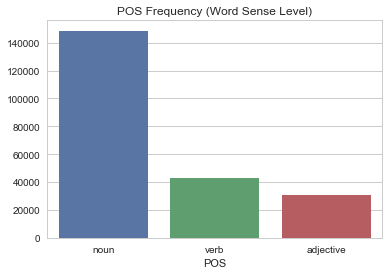

In [15]:
sns.countplot(data=wordnet_df, x='pos')
plt.title('POS Frequency (Word Sense Level)')
plt.ylabel('')
plt.xlabel('POS');

Note that `.count()` works in this instance because we have replaced the empty lists with NaNs. The count thus reflects the number of senses per POS category that have an antonym.

In [16]:
senses_grouped_pos = wordnet_df.groupby(['pos'])
senses_grouped_pos.count()

,word,antonym
pos,,
adjective,30715,5154
noun,148627,3112
verb,42775,3861


In [17]:
print('Percentage of adjectives that have antonyms:', round((5154/30715)*100, 2))
print('Percentage of nouns that have antonyms:', round((3112/148627)*100, 2))
print('Percentage of verbs that have antonyms:', round((3861/42775)*100, 2))

Percentage of adjectives that have antonyms: 16.78
Percentage of nouns that have antonyms: 2.09
Percentage of verbs that have antonyms: 9.03


*QUESTION 1: Does the likelihood of a word in a specific sense having an antonym differ by
part of speech?*

Yes. Adjectives are significantly more likely than nouns and verbs to have antonyms. This reflects Miller's (1995) comment that antonymy is 'especially important in organizing the meanings of adjectives and adverbs' (p. 40).

**Word Level**

*Note*: have to group by both word and POS. If you only group by word, distinctions between different POS-versions of the word are collapsed (e.g., take as a noun and take as a verb are viewed as one word, as opposed to two).

In [18]:
words_df = wordnet_df.groupby(['word', 'pos']).count().reset_index()
words_df.insert(3, 'antonym_binary', np.where(words_df['antonym'] > 0, 1, 0))
words_df.shape

(155530, 4)

In [19]:
words_df.sample(10)

,word,pos,antonym,antonym_binary
116804,return_on_investment,noun,0,0
20388,cajole,verb,0,0
49634,family_rhiptoglossa,noun,0,0
42010,drumhead,noun,0,0
117034,rh_factor,noun,0,0
8087,aristocratical,adjective,0,0
139751,third_council_of_constantinople,noun,0,0
108960,preceding,adjective,1,1
84700,madderwort,noun,0,0
47870,exsiccate,verb,0,0


In [20]:
words_df.pos.value_counts()

noun         117830
adjective    21593 
verb         16107 
Name: pos, dtype: int64

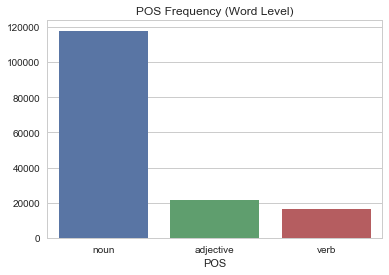

In [21]:
sns.countplot(data=words_df, x='pos')
plt.title('POS Frequency (Word Level)')
plt.ylabel('')
plt.xlabel('POS');

Note that we must use `.sum()` as opposed to `.count()` here because we have 0s and 1s as opposed to NaNs. The sum thus reflects the number of words per POS category that have an antonym. Because we should only count antonyms listed under more than one sense for the same POS once, the column of interest is `antonym_binary`.

In [22]:
words_grouped_pos = words_df.groupby(['pos'])
words_grouped_pos.sum()

,antonym,antonym_binary
pos,,
adjective,5154,4280
noun,3112,2800
verb,3861,2864


In [23]:
print('Percentage of adjectives that have antonyms:', round((4280/21593)*100, 2))
print('Percentage of nouns that have antonyms:', round((2800/117830)*100, 2))
print('Percentage of verbs that have antonyms:', round((2864/16107)*100, 2))

Percentage of adjectives that have antonyms: 19.82
Percentage of nouns that have antonyms: 2.38
Percentage of verbs that have antonyms: 17.78


*QUESTION 2: Does the likelihood of having an antonym differ by part of speech at the WORD-POS
level (i.e., ignoring the nuances of different senses)? Are the results pretty much the
same, or obviously different, from the answer to QUESTION 1?*

Yes, and the results are slightly different from those for Question 1. Adjectives are the most likely to have antonyms, but verbs are not far behind. Why has the proportion of verbs with antonyms increased (to be more specific, almost doubled)? The frequencies of verbs vs. adjectives at the WORD-POS and WORD-SENSE levels reflect that verbs are more **polysemous** than adjectives - they are more likely to have multiple senses. If even one of these senses has an antonym, at the WORD-POS level the entire word has an antonym.

### Part 2: Symmetry

Examine the dataframe (created above) that only contains words with antonyms. Add antonym count as a column in preparation for symmetry calculation.

In [24]:
has_antonym['antonym_count'] = has_antonym.antonym.apply(lambda x: len(x))
print(has_antonym['antonym_count'].value_counts())
print(has_antonym.shape)
has_antonym.sample(10)

1    11769
2    341  
3    17   
Name: antonym_count, dtype: int64
(12127, 4)


C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,word,pos,antonym,antonym_count
synset,,,,
Synset('relative.a.01'),relative,adjective,[Lemma('absolute.a.01.absolute')],1
Synset('desecrate.v.02'),unhallowed,verb,[Lemma('consecrate.v.04.consecrate')],1
Synset('uninviting.a.01'),uninviting,adjective,[Lemma('inviting.a.01.inviting')],1
Synset('gloveless.a.01'),gloveless,adjective,[Lemma('gloved.a.01.gloved')],1
Synset('drop_out.v.01'),drop_by_the_wayside,verb,[Lemma('enter.v.02.enter')],1
Synset('stop.v.01'),halt,verb,[Lemma('start.v.09.start')],1
Synset('susceptibility.n.01'),susceptibleness,noun,[Lemma('unsusceptibility.n.01.unsusceptibility')],1
Synset('inclement.a.02'),inclement,adjective,[Lemma('clement.a.02.clement')],1
Synset('color.n.01'),colour,noun,[Lemma('colorlessness.n.01.colorlessness')],1


Test WordNet's antonym structure. Note that some words do not have antonyms.

In [25]:
print(wn.lemma('dramatic.a.01.dramatic').antonyms())
print(wn.lemma('dramatic.a.01.dramatic').antonyms()[0].antonyms())
wn.lemma('dramatic.a.01.dramatic') in wn.lemma('dramatic.a.01.dramatic').antonyms()[0].antonyms()

[Lemma('undramatic.a.01.undramatic')]
[Lemma('dramatic.a.01.dramatic')]


True

In [26]:
print(wn.lemma('mesic.a.02.mesic').antonyms())
print(wn.lemma('mesic.a.02.mesic').antonyms()[0].antonyms())
wn.lemma('mesic.a.02.mesic') in wn.lemma('mesic.a.02.mesic').antonyms()[0].antonyms()

[Lemma('xeric.a.01.xeric'), Lemma('hydric.a.01.hydric')]
[Lemma('hydric.a.01.hydric'), Lemma('mesic.a.02.mesic')]


True

In [27]:
print(wn.lemma('miss.v.06.lack').antonyms())

[]


In [28]:
print(wn.lemma('centralize.v.01.centralise').antonyms())
print(wn.lemma('centralize.v.01.centralise').antonyms()[0].antonyms())

[Lemma('decentralize.v.01.decentralise')]
[]


Calculate symmetry scores at the WORD-LEMMA level, accounting for the fact that some words do not have antonyms, and display words that have a score below 1.0.

In [29]:
symmetry = [0 for i in range(len(has_antonym))]

for count, (index, row) in enumerate(has_antonym.iterrows()):
    for antonym in row['antonym']:
        if len(antonym.antonyms()) == 0:
            continue
        elif antonym in antonym.antonyms()[0].antonyms():
            symmetry[count] += 1
        else:
            continue
    symmetry[count] = symmetry[count]/row['antonym_count']

has_antonym['symmetry_score'] = symmetry
has_antonym.head()

C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,word,pos,antonym,antonym_count,symmetry_score
synset,,,,,
Synset('outwardness.n.02'),externality,noun,[Lemma('inwardness.n.03.inwardness')],1,1.0
Synset('spiritualize.v.01'),spiritualise,verb,[Lemma('literalize.v.01.literalize')],1,1.0
Synset('overdress.v.02'),dress_up,verb,[Lemma('dress_down.v.02.underdress')],1,1.0
Synset('professional.n.02'),professional,noun,[Lemma('amateur.n.02.amateur')],1,1.0
Synset('professional.a.01'),professional,adjective,[Lemma('nonprofessional.a.01.nonprofessional')],1,1.0


In [30]:
print(len(has_antonym[has_antonym.symmetry_score < 1.0]), 'words at the WORD-LEMMA level have a symmetry score below 1.0.')
has_antonym[has_antonym.symmetry_score < 1.0]

15 words at the WORD-LEMMA level have a symmetry score below 1.0.


,word,pos,antonym,antonym_count,symmetry_score
synset,,,,,
Synset('decentralize.v.01'),decentralizing,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5
Synset('miss.v.06'),missed,verb,[Lemma('have.v.02.have')],1,0.0
Synset('decentralize.v.01'),decentralise,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5
Synset('decentralize.v.01'),decentralized,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5
Synset('miss.v.06'),missing,verb,[Lemma('have.v.02.have')],1,0.0
Synset('decentralize.v.01'),decentralising,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5
Synset('decentralize.v.01'),deconcentrate,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5
Synset('have.v.02'),feature,verb,[Lemma('miss.v.06.lack')],1,0.0
Synset('decentralize.v.01'),decentralised,verb,"[Lemma('centralize.v.01.centralize'), Lemma('centralize.v.01.centralise')]",2,0.5


Aggregate to the WORD-POS level and display the words with a symmetry score below 1.0.

In [31]:
words_symmetry_df = has_antonym.groupby(['word', 'pos']).mean().reset_index()
words_symmetry_df.head()

,word,pos,antonym_count,symmetry_score
0,a_la_carte,adjective,1.0,1.0
1,a_posteriori,adjective,1.0,1.0
2,a_priori,adjective,1.0,1.0
3,abactinal,adjective,1.0,1.0
4,abaxial,adjective,1.0,1.0


In [32]:
words_symmetry_df[words_symmetry_df.symmetry_score < 1.0]

,word,pos,antonym_count,symmetry_score
1937,decentralise,verb,2.0,0.500000
1939,decentralised,verb,2.0,0.500000
1941,decentralising,verb,2.0,0.500000
1943,decentralize,verb,2.0,0.500000
1945,decentralized,verb,2.0,0.500000
1947,decentralizing,verb,2.0,0.500000
1978,deconcentrate,verb,2.0,0.500000
3232,feature,verb,1.0,0.000000
3233,featured,verb,1.0,0.000000
3749,have,verb,1.0,0.666667


Sanity check to make sure the average scores are accurate.

In [33]:
has_antonym[has_antonym.word == 'miss']

,word,pos,antonym,antonym_count,symmetry_score
synset,,,,,
Synset('miss.v.03'),miss,verb,[Lemma('attend.v.01.attend')],1,1.0
Synset('neglect.v.01'),miss,verb,[Lemma('attend_to.v.01.attend_to')],1,1.0
Synset('miss.v.06'),miss,verb,[Lemma('have.v.02.have')],1,0.0
Synset('miss.v.07'),miss,verb,[Lemma('hit.v.02.hit')],1,1.0


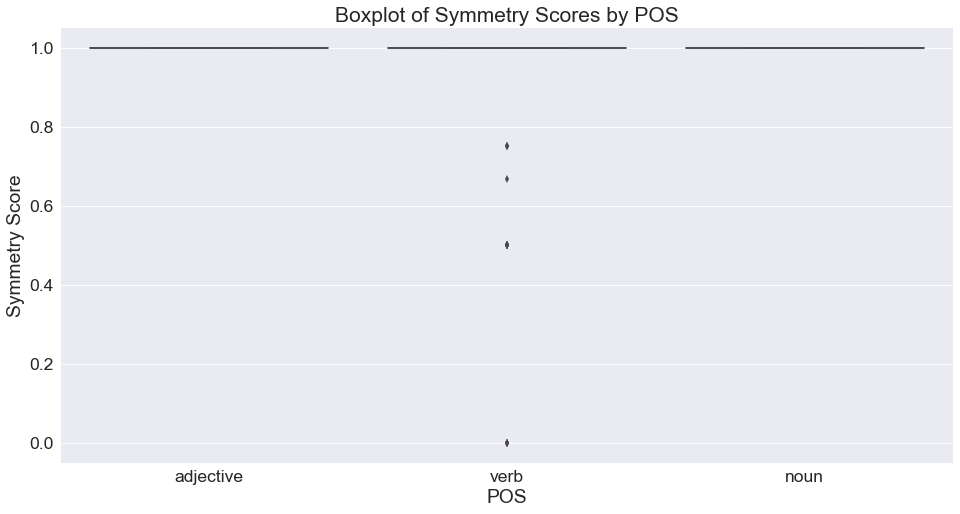

In [34]:
sns.set(font_scale=1.75)
fig = plt.figure(figsize=(16,8))
sns.boxplot(x='pos', y='symmetry_score', data=words_symmetry_df)
plt.title('Boxplot of Symmetry Scores by POS')
plt.ylabel('Symmetry Score')
plt.xlabel('POS');

*QUESTION 3: Display the three distributions using boxplots. Comment briefly on what you see
in your plot.*

The vast majority of words that have antonyms are perfectly symmetrical (there is a huge concentration of scores at 1.0). Only 15 words do not have symmetry scores of 1.0, and they are all verbs. Closer inspection reveals that these words are morphologically related to each other: e.g., feature, featured; lack, lacking; miss, missed, missing. About half of the words are variants of decentralise/decentralize, and this British vs. North American spelling accounts for the lack of perfect symmetry. Thus, in these cases the lack of symmetry is due to a technicality. Miller's (1995) claim about the antonym relation has been strongly affirmed.

### Part 3: Similarity

In [35]:
graveyard = wn.synsets('graveyard')[0]
madhouse = wn.synsets('madhouse')[0]
furnace = wn.synsets('furnace')[0]
implement = wn.synsets('implement')[0]
midday = wn.synsets('midday')[0]
noon = wn.synsets('noon')[0]

In [36]:
print(graveyard.path_similarity(madhouse))
print(furnace.path_similarity(implement))
print(midday.path_similarity(noon))
print(graveyard.path_similarity(graveyard))
print(midday.path_similarity(midday))

0.06666666666666667
0.125
1.0
1.0
1.0


In [37]:
print(graveyard.lch_similarity(madhouse))
print(furnace.lch_similarity(implement))
print(midday.lch_similarity(noon))
print(graveyard.lch_similarity(graveyard))
print(midday.lch_similarity(midday))

0.9295359586241757
1.55814461804655
3.6375861597263857
3.6375861597263857
3.6375861597263857


Given these examples, identity emerges as the limit for large similarity for both `path_similarity` and `lch_similarity`. To test whether this is always the case for `lch_similarity`, words from taxonomies with different depths should be examined.

In [38]:
similarity_df = has_antonym[(has_antonym.pos=='noun') | (has_antonym.pos=='verb')]
print(similarity_df.shape)
similarity_df.head()

(6973, 5)


,word,pos,antonym,antonym_count,symmetry_score
synset,,,,,
Synset('outwardness.n.02'),externality,noun,[Lemma('inwardness.n.03.inwardness')],1,1.0
Synset('spiritualize.v.01'),spiritualise,verb,[Lemma('literalize.v.01.literalize')],1,1.0
Synset('overdress.v.02'),dress_up,verb,[Lemma('dress_down.v.02.underdress')],1,1.0
Synset('professional.n.02'),professional,noun,[Lemma('amateur.n.02.amateur')],1,1.0
Synset('antagonist.n.03'),antagonist,noun,[Lemma('synergist.n.01.synergist')],1,1.0


Test lemma to synset and `path_similarity` methods.

In [39]:
wn.lemma('transparency.n.01.transparency').synset()

Synset('transparency.n.01')

In [40]:
wn.synset('opacity.n.01').path_similarity(wn.synset('transparency.n.01'))

0.3333333333333333

Test random sampling of a synset from the same POS.

In [41]:
similarity_df[similarity_df.pos=='noun'].sample(1).index[0]

Synset('queen.n.02')

In [42]:
path_similarity_antonym = []
path_similarity_random = []

for count, (index, row) in enumerate(similarity_df.iterrows()):
    antonym_synset = row['antonym'][0].synset()
    synset_pos = row['pos']
    random_synset = similarity_df[similarity_df.pos==synset_pos].sample(1).index[0]
    path_similarity_antonym.append(index.path_similarity(antonym_synset))
    path_similarity_random.append(index.path_similarity(random_synset))
    
print(path_similarity_antonym[:10])
print(path_similarity_random[:10])

[0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.125, 0.09090909090909091, 0.25, 0.058823529411764705, 0.3333333333333333]
[0.14285714285714285, 0.125, 0.16666666666666666, 0.08333333333333333, 0.08333333333333333, 0.07142857142857142, 0.14285714285714285, 0.07692307692307693, 0.07142857142857142, 0.14285714285714285]


In [43]:
similarity_df['path_similarity_antonym'] = path_similarity_antonym
similarity_df['path_similarity_random'] = path_similarity_random
similarity_df.head()

C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,word,pos,antonym,antonym_count,symmetry_score,path_similarity_antonym,path_similarity_random
synset,,,,,,,
Synset('outwardness.n.02'),externality,noun,[Lemma('inwardness.n.03.inwardness')],1,1.0,0.333333,0.142857
Synset('spiritualize.v.01'),spiritualise,verb,[Lemma('literalize.v.01.literalize')],1,1.0,0.333333,0.125000
Synset('overdress.v.02'),dress_up,verb,[Lemma('dress_down.v.02.underdress')],1,1.0,0.333333,0.166667
Synset('professional.n.02'),professional,noun,[Lemma('amateur.n.02.amateur')],1,1.0,0.333333,0.083333
Synset('antagonist.n.03'),antagonist,noun,[Lemma('synergist.n.01.synergist')],1,1.0,0.333333,0.083333


Check for no value.

In [44]:
print(len(similarity_df[similarity_df.path_similarity_antonym.isnull()]))
print(len(similarity_df[similarity_df.path_similarity_random.isnull()]))

0
0


C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


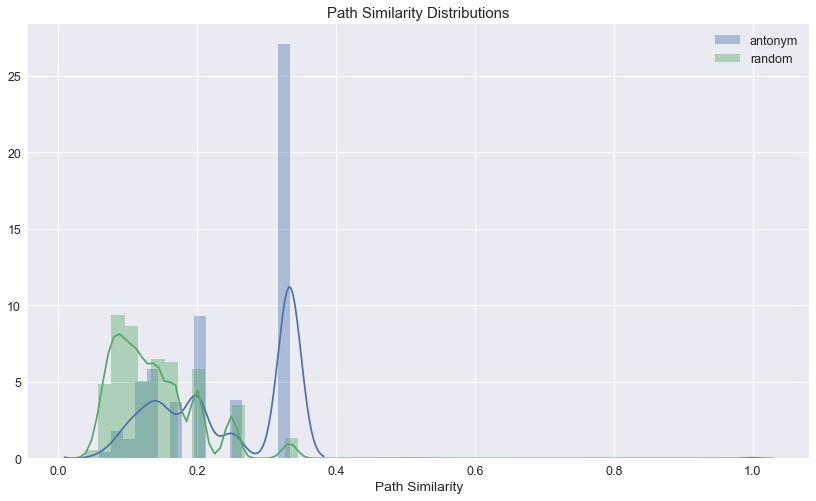

In [45]:
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df['path_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df['path_similarity_random'], ax=ax, label='random')
plt.title('Path Similarity Distributions')
plt.xlabel('Path Similarity')
ax.legend();

C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


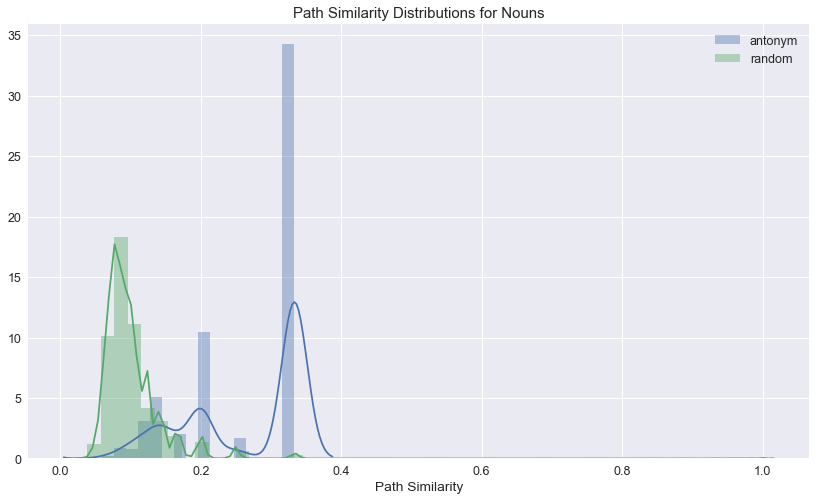

In [46]:
similarity_df_nouns = similarity_df[similarity_df.pos=='noun']

fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df_nouns['path_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df_nouns['path_similarity_random'], ax=ax, label='random')
plt.title('Path Similarity Distributions for Nouns')
plt.xlabel('Path Similarity')
ax.legend();

C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


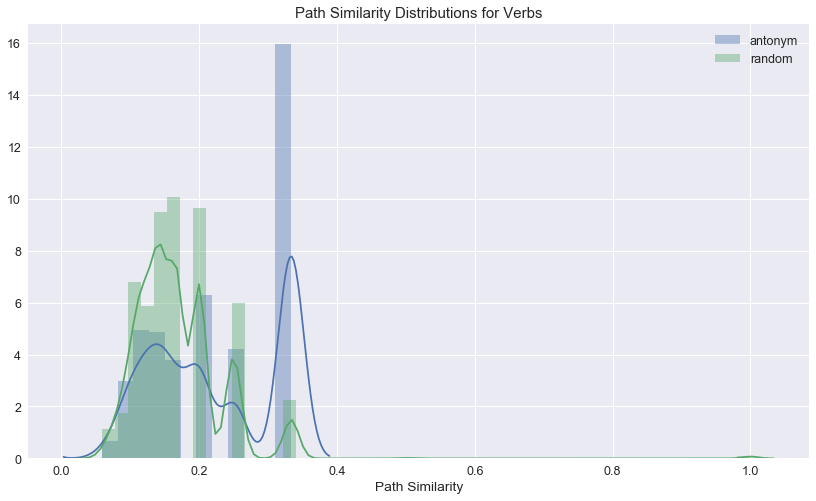

In [47]:
similarity_df_verbs = similarity_df[similarity_df.pos=='verb']

fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df_verbs['path_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df_verbs['path_similarity_random'], ax=ax, label='random')
plt.title('Path Similarity Distributions for Verbs')
plt.xlabel('Path Similarity')
ax.legend();

*QUESTION 4: How does typical similarity for antonym pairs compare with similarity for the
random pairs? How does the amount of variation (across WORD-SENSES) compare for the
antonym pairs vs. the random pairs? Does the nature of this comparison depend on the POS?*

Path similarity for antonym pairs is typically greater than for random pairs. There is greater variation for the antonym pairs. The differences are more pronounced for nouns than for verbs.

In [48]:
lch_similarity_antonym = []
lch_similarity_random = []

for count, (index, row) in enumerate(similarity_df.iterrows()):
    antonym_synset = row['antonym'][0].synset()
    synset_pos = row['pos']
    random_synset = similarity_df[similarity_df.pos==synset_pos].sample(1).index[0]
    lch_similarity_antonym.append(index.lch_similarity(antonym_synset))
    lch_similarity_random.append(index.lch_similarity(random_synset))
    
print(lch_similarity_antonym[:10])
print(lch_similarity_random[:10])

[2.538973871058276, 2.159484249353372, 2.159484249353372, 2.538973871058276, 2.538973871058276, 1.55814461804655, 0.8602012652231115, 1.8718021769015913, 0.42488319396526597, 2.159484249353372]
[1.4403615823901665, 1.466337068793427, 1.0608719606852628, 1.072636802264849, 1.6916760106710724, 1.2396908869280152, 1.466337068793427, 0.5500463369192721, 0.5500463369192721, 0.9555114450274363]


In [49]:
similarity_df['lch_similarity_antonym'] = lch_similarity_antonym
similarity_df['lch_similarity_random'] = lch_similarity_random
similarity_df.head()

C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Periwynkle\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,word,pos,antonym,antonym_count,symmetry_score,path_similarity_antonym,path_similarity_random,lch_similarity_antonym,lch_similarity_random
synset,,,,,,,,,
Synset('outwardness.n.02'),externality,noun,[Lemma('inwardness.n.03.inwardness')],1,1.0,0.333333,0.142857,2.538974,1.440362
Synset('spiritualize.v.01'),spiritualise,verb,[Lemma('literalize.v.01.literalize')],1,1.0,0.333333,0.125000,2.159484,1.466337
Synset('overdress.v.02'),dress_up,verb,[Lemma('dress_down.v.02.underdress')],1,1.0,0.333333,0.166667,2.159484,1.060872
Synset('professional.n.02'),professional,noun,[Lemma('amateur.n.02.amateur')],1,1.0,0.333333,0.083333,2.538974,1.072637
Synset('antagonist.n.03'),antagonist,noun,[Lemma('synergist.n.01.synergist')],1,1.0,0.333333,0.083333,2.538974,1.691676


In [50]:
print(len(similarity_df[similarity_df.lch_similarity_antonym.isnull()]))
print(len(similarity_df[similarity_df.lch_similarity_random.isnull()]))

0
0


C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


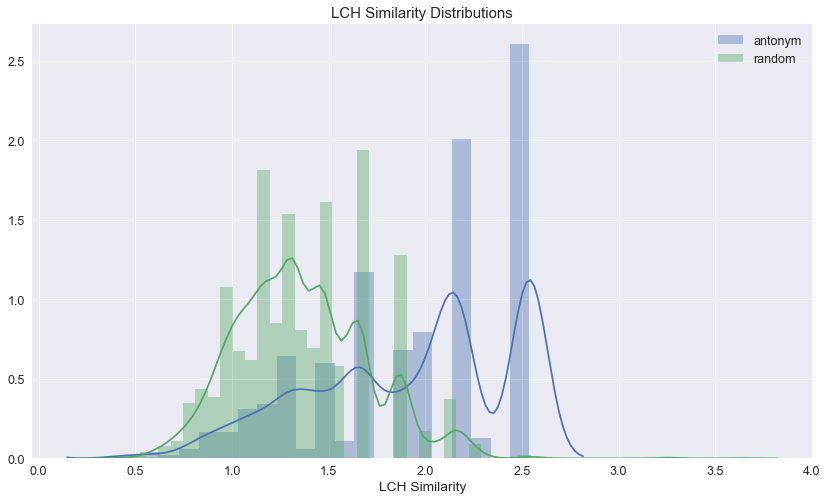

In [51]:
fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df['lch_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df['lch_similarity_random'], ax=ax, label='random')
plt.title('LCH Similarity Distributions')
plt.xlabel('LCH Similarity')
ax.legend();

C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


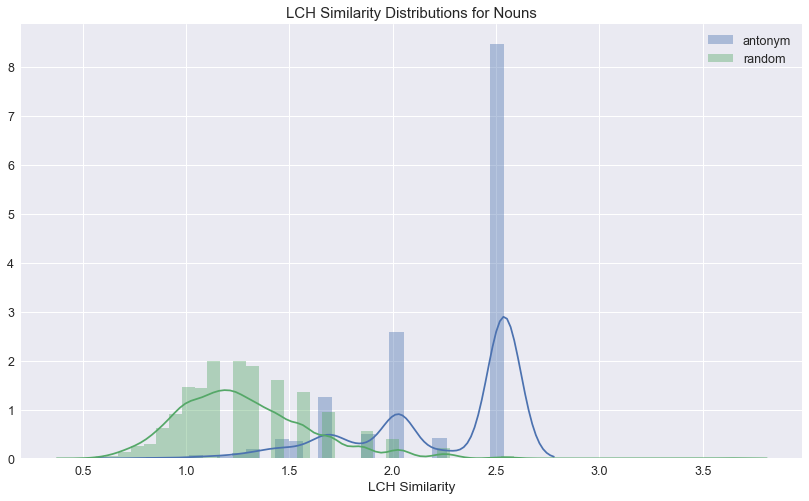

In [52]:
similarity_df_nouns = similarity_df[similarity_df.pos=='noun']

fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df_nouns['lch_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df_nouns['lch_similarity_random'], ax=ax, label='random')
plt.title('LCH Similarity Distributions for Nouns')
plt.xlabel('LCH Similarity')
ax.legend();

C:\Users\Periwynkle\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


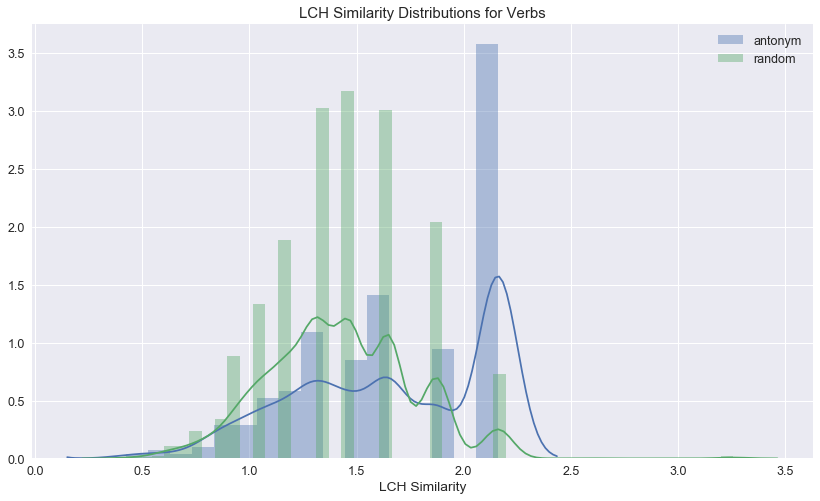

In [53]:
similarity_df_verbs = similarity_df[similarity_df.pos=='verb']

fig, ax = plt.subplots(figsize=(14,8))
sns.distplot(similarity_df_verbs['lch_similarity_antonym'], ax=ax, label='antonym')
sns.distplot(similarity_df_verbs['lch_similarity_random'], ax=ax, label='random')
plt.title('LCH Similarity Distributions for Verbs')
plt.xlabel('LCH Similarity')
ax.legend();

*QUESTION 5: How do the results for lch_similarity compare to those for path_similarity?
Comment on your results in relation to two different aspects of Budanitsky and Hirst. Are the
results for lch_similarity more well-behaved or interpretable than the results for
path_similarity? In general, to what extent is the claim that ‘antonymous concepts are
dissimilar’ supported?*

The distributions are quite similar, but on a larger scale (0 to ~3.6 as opposed to 0 to 1). Thus, the claim that ‘antonymous concepts are dissimilar’ is **not** supported by both similarity metrics, and evidence against this claim is much stronger for nouns than it is for verbs. Note, however, that Budanitsky and Hirst's full claim does acknowledge that antonymous concepts can be semantically related in another interpretation: 'Most of the time, these two uses are consistent with one another, but not always; antonymous concepts are dissimilar and hence distant in one sense, and yet are strongly related semantically and hence close in the other sense'.